In [1]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [124]:
dataset = pd.read_csv('./panthera_dataset/list_photo_prep.csv')

# Update files name in the correct format
dataset['Photo'] = dataset['Photo'].map(lambda id: '{:08}'.format(id))
dataset['Photo'] = dataset['Photo'].astype(str)

nbrImg = len(dataset)

X = []
y = []

imgSize = 224

for i in range(nbrImg):
    # defining the image path
    image_path = './panthera_dataset/img/' + str(dataset.loc[i, 'Photo']) + '.jpg'
    # reading the image
    img = imread(image_path, as_gray=True)
    img = resize(img, (imgSize, imgSize))
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    X.append(img)

    y.append(dataset.loc[i, 'Animal'])
    
    print(i, '/', nbrImg)

# converting the list to numpy array
X = np.array(X)
y = np.array(y)

0 / 85
1 / 85
2 / 85
3 / 85
4 / 85
5 / 85
6 / 85
7 / 85
8 / 85
9 / 85
10 / 85
11 / 85
12 / 85
13 / 85
14 / 85
15 / 85
16 / 85
17 / 85
18 / 85
19 / 85
20 / 85
21 / 85
22 / 85
23 / 85
24 / 85
25 / 85
26 / 85
27 / 85
28 / 85
29 / 85
30 / 85
31 / 85
32 / 85
33 / 85
34 / 85
35 / 85
36 / 85
37 / 85
38 / 85
39 / 85
40 / 85
41 / 85
42 / 85
43 / 85
44 / 85
45 / 85
46 / 85
47 / 85
48 / 85
49 / 85
50 / 85
51 / 85
52 / 85
53 / 85
54 / 85
55 / 85
56 / 85
57 / 85
58 / 85
59 / 85
60 / 85
61 / 85
62 / 85
63 / 85
64 / 85
65 / 85
66 / 85
67 / 85
68 / 85
69 / 85
70 / 85
71 / 85
72 / 85
73 / 85
74 / 85
75 / 85
76 / 85
77 / 85
78 / 85
79 / 85
80 / 85
81 / 85
82 / 85
83 / 85
84 / 85


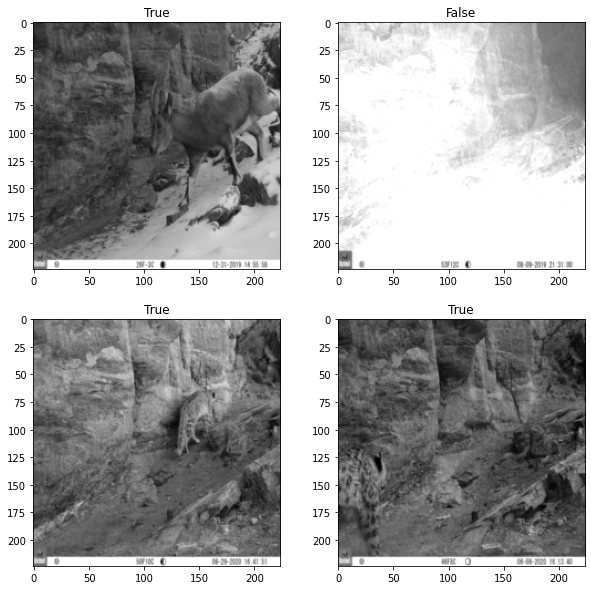

In [147]:
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(X[i], cmap='gray')
plt.gca().set_title(dataset.loc[i, 'Animal'])
plt.subplot(222), plt.imshow(X[i+25], cmap='gray')
plt.gca().set_title(dataset.loc[i+25, 'Animal'])
plt.subplot(223), plt.imshow(X[i+50], cmap='gray')
plt.gca().set_title(dataset.loc[i+50, 'Animal'])
plt.subplot(224), plt.imshow(X[i+75], cmap='gray')
plt.gca().set_title(dataset.loc[i+75, 'Animal'])
plt.show()

In [126]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.2)
#print((train_x.shape, train_y.shape))
#print((val_x.shape, val_y.shape))

In [127]:
# converting training images into torch format
train_x = train_x.reshape(68, 1, imgSize, imgSize)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(np.int64)
train_y = torch.from_numpy(train_y)

# shape of training data
print(train_x.shape)
print(train_y.shape)

torch.Size([68, 1, 224, 224])
torch.Size([68])


In [128]:
# converting validation images into torch format
val_x = val_x.reshape(17, 1, imgSize, imgSize)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(np.int64)
val_y = torch.from_numpy(val_y)

# shape of validation data
print(val_x.shape)
print(val_y.shape)

torch.Size([17, 1, 224, 224])
torch.Size([17])


In [133]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(12544, 2)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [134]:
# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=12544, out_features=2, bias=True)
  )
)


In [135]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train.detach().numpy())
    val_losses.append(loss_val.detach().numpy())

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [136]:
# defining the number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(0.8268, grad_fn=<NllLossBackward>)
Epoch :  3 	 loss : tensor(76.4775, grad_fn=<NllLossBackward>)
Epoch :  5 	 loss : tensor(61.5301, grad_fn=<NllLossBackward>)
Epoch :  7 	 loss : tensor(46.2524, grad_fn=<NllLossBackward>)
Epoch :  9 	 loss : tensor(42.7185, grad_fn=<NllLossBackward>)
Epoch :  11 	 loss : tensor(32.2533, grad_fn=<NllLossBackward>)
Epoch :  13 	 loss : tensor(18.8875, grad_fn=<NllLossBackward>)
Epoch :  15 	 loss : tensor(12.2517, grad_fn=<NllLossBackward>)
Epoch :  17 	 loss : tensor(9.4334, grad_fn=<NllLossBackward>)
Epoch :  19 	 loss : tensor(7.6908, grad_fn=<NllLossBackward>)
Epoch :  21 	 loss : tensor(7.4614, grad_fn=<NllLossBackward>)
Epoch :  23 	 loss : tensor(7.5254, grad_fn=<NllLossBackward>)
Epoch :  25 	 loss : tensor(7.1899, grad_fn=<NllLossBackward>)


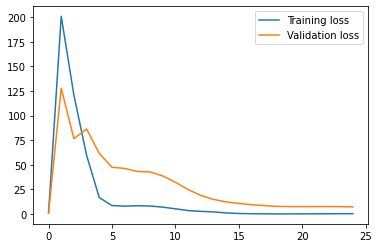

In [137]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [138]:
# prediction for training set
with torch.no_grad():
    output = model(train_x)
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

0.9558823529411765

In [139]:
# prediction for validation set
with torch.no_grad():
    output = model(val_x)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(val_y, predictions)

0.8823529411764706